In [ ]:
import numpy as np                                          # deals with arrays (1d,2d,...)
import matplotlib.pyplot as plt                             # deals with graphical representation
from PIL import Image                                       # for input output images
import os                                                   # for system files gothrough
from sklearn.model_selection import train_test_split        # for splitting data into training and testing
import keras
from keras.utils import to_categorical                      # for one hot encoding
from keras.models import Sequential                         # load_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense  # parts of model

##Dataset Augmentation


Mounting the drive to colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Applying different transformations of image

(Which will be stored in drive's folder, we mounted)

In [ ]:
############### # om bhauuuu # #########################################################################
#      Dont run this cell
#we already made dataset (200 images for each traffic-sign)  and  stored it in drive

import cv2
import os
import random
import numpy as np
from PIL import Image, ImageFilter       #for blurriness

def augment_image(input_path, output_path, num_images=200, file_item_preffix=""):
    # Ensure the output directory exists
    os.makedirs(output_path, exist_ok=True)

    # Read the input image
    original_image = cv2.imread(input_path)

    for i in range(num_images):
        # Create a copy of the original image for each augmentation
        augmented_image = original_image.copy()

        # Random Rotation

        angle = random.randint(-45, 45)  # Adjusting degree between -45 to 45
        augmented_image = Image.fromarray(augmented_image)   # Numpy --> PIL
        augmented_image = augmented_image.rotate(np.array(angle), resample=Image.BICUBIC)
        augmented_image = np.array(augmented_image)          # PIL --> Numpy

        # Random Brightness and Contrast

        alpha = np.random.uniform(0.7, 1.3)  # Brightness control
        beta = np.random.uniform(-30, 30)    # Contrast control
        augmented_image = cv2.addWeighted(augmented_image, alpha, np.zeros_like(augmented_image), 0, beta)

        # Random Noise Addition

        noise = np.random.normal(0, 25, augmented_image.shape)
        augmented_image = cv2.add(augmented_image, noise.astype(augmented_image.dtype))

        # Clip pixel values to the valid range [0, 255]

        augmented_image = np.clip(augmented_image, 0, 255)

        # Save the augmented image

        output_file = os.path.join(output_path, f"___{file_item_preffix}___{i}.png")
        cv2.imwrite(output_file, augmented_image)

import os
dataset_path = "/content/drive/MyDrive/Dataset"
listOfimgs = os.listdir(dataset_path)
print(listOfimgs)

for i in range(len(listOfimgs)):                                 # This loop is taking one by one images and
                                                                 #passing it to the function augment_image(in,out,no,prefix)

  input_image_path = "/content/drive/MyDrive/Dataset/"+listOfimgs[i]
  output_directory = "/content/drive/MyDrive/D200_2/"+str(i)
  file_item_preffix = str(i)
  print(input_image_path)
  augment_image(input_image_path, output_directory, 200, file_item_preffix)



['Horn.png', 'Curve to the left.png', 'Curve to the right.png', 'Steep descent.png', 'Steep ascent.png', 'Road narrows.png', 'Road narrows on left side.png', 'Road narrows on right side.png', 'Opening bridge.png', 'Quayside or riverbank ahead.png', 'Uneven road.png', 'Road for bump.png', 'Dip.png', 'Slippery road.png', 'Slippery road(1).png', 'Loose stones.png', 'Falling rocks.png', 'Pedestrian crossing.png', 'Children.png', 'Cyclists.png', 'Animals for cattle.png', 'Animals for deer.png', 'Roadworks.png', 'Traffic signals.png', 'Crossroad without priority.png', 'Crossroad without priority(1).png', 'Side road junction to left.png', 'Side road junction to right.png', 'Roundabout.png', 'Two-way traffic.png', 'Level crossing with barriers ahead.png', 'Level crossing without barriers ahead.png', 'Low-flying aircraft.png', 'Crosswind.png', 'Other dangers.png', 'Priority for oncoming traffic.png', 'Stop.png', 'Give way.png', 'No entry.jpg', 'One way.jpg', 'One way(1).jpg', 'Right turn prohib

Taking image and diplay

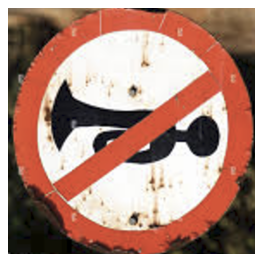

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# Open the image
image_path = "/content/drive/MyDrive/Dataset/Horn.png"
image = Image.open(image_path)

# Set the figure size and dpi
fig = plt.figure(figsize=(4, 4), dpi=80)

# Display the image
plt.imshow(image)

# Hide the axes
plt.axis('off')

# Show the plot
plt.show()

Making a dictionary (Gives the index for each image)

In [ ]:
import os
dataset_path = "/content/drive/MyDrive/Dataset"
listOfimgs = os.listdir(dataset_path)

Index_with_img = dict()

for i in range(len(listOfimgs)):
  Index_with_img[i] = listOfimgs[i][:-4]

print(Index_with_img)

{0: 'Horn', 1: 'Curve to the left', 2: 'Curve to the right', 3: 'Steep descent', 4: 'Steep ascent', 5: 'Road narrows', 6: 'Road narrows on left side', 7: 'Road narrows on right side', 8: 'Opening bridge', 9: 'Quayside or riverbank ahead', 10: 'Uneven road', 11: 'Road for bump', 12: 'Dip', 13: 'Slippery road', 14: 'Slippery road(1)', 15: 'Loose stones', 16: 'Falling rocks', 17: 'Pedestrian crossing', 18: 'Children', 19: 'Cyclists', 20: 'Animals for cattle', 21: 'Animals for deer', 22: 'Roadworks', 23: 'Traffic signals', 24: 'Crossroad without priority', 25: 'Crossroad without priority(1)', 26: 'Side road junction to left', 27: 'Side road junction to right', 28: 'Roundabout', 29: 'Two-way traffic', 30: 'Level crossing with barriers ahead', 31: 'Level crossing without barriers ahead', 32: 'Low-flying aircraft', 33: 'Crosswind', 34: 'Other dangers', 35: 'Priority for oncoming traffic', 36: 'Stop', 37: 'Give way', 38: 'No entry', 39: 'One way', 40: 'One way(1)', 41: 'Right turn prohibited',

##Storing each image in a numpy array

In [ ]:
from PIL import Image
import numpy as np
import os

data = []      #where we store images
labels = []    #here we store labels of images of data
classes = 48

for i in range(classes):

  path = os.path.join(os.getcwd(),'/content/drive/MyDrive/D200_2/',str(i))    #getcwd() method tells us the location of current working directory (CWD).
  images = os.listdir(path)                                            #os.listdir() method is used to get the list of all files and directories in the specified directory.

  for j in images:

    try:
      image = Image.open(path + '//'+ j)                               # taking an image from path
      image = image.resize((90,90))                                    # resizing it to (30,30)
      image = np.array(image)                                          # converting it into np.array
      data.append(image)                                               # list me image append kro
      labels.append(i)                                                 # list labels me labels store kro (0-47)
      print(f"successfully..getting...{str(i),j}")
    except:
        print("Error loading image")


Streaming output truncated to the last 5000 lines.
successfully..getting...('23', '___23___0.png')
successfully..getting...('23', '___23___1.png')
successfully..getting...('23', '___23___2.png')
successfully..getting...('23', '___23___3.png')
successfully..getting...('23', '___23___4.png')
successfully..getting...('23', '___23___5.png')
successfully..getting...('23', '___23___6.png')
successfully..getting...('23', '___23___7.png')
successfully..getting...('23', '___23___8.png')
successfully..getting...('23', '___23___9.png')
successfully..getting...('23', '___23___10.png')
successfully..getting...('23', '___23___11.png')
successfully..getting...('23', '___23___12.png')
successfully..getting...('23', '___23___13.png')
successfully..getting...('23', '___23___14.png')
successfully..getting...('23', '___23___15.png')
successfully..getting...('23', '___23___16.png')
successfully..getting...('23', '___23___17.png')
successfully..getting...('23', '___23___18.png')
successfully..getting...('23

In [ ]:
# for i in range(2):
#   for j in range(len(data)):
#       try:
#         if data[j].shape == (30,30):
#           data.pop(j)
#           labels.pop(j)
#       except:
#         print("reaching last index of list")


In [ ]:
import numpy as np
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(9600, 90, 90, 3) (9600,)


In [ ]:
a = set(labels)
print(a)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47}


0


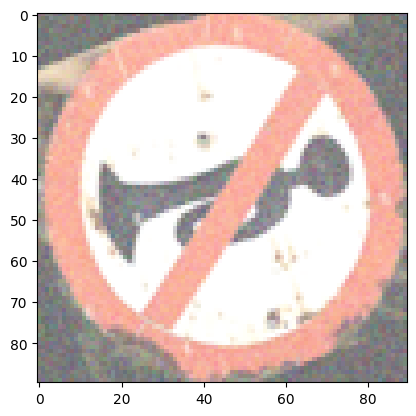

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
plt.imshow(data[70], interpolation='nearest')
print(labels[70])
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=68)

# Also making a separate validation set
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=31)

In [ ]:
print("training data    :",X_train.shape)
print("training labels  :",y_train.shape)
print()
print("testing data      :",X_test.shape)
print("testing labels    :",y_test.shape)
print()
print("Validation data   :",X_validation.shape)
print("Validation labels :",y_validation.shape)

training data    : (7680, 90, 90, 3)
training labels  : (7680,)

testing data      : (960, 90, 90, 3)
testing labels    : (960,)

Validation data   : (960, 90, 90, 3)
Validation labels : (960,)


In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,48)
y_test = to_categorical(y_test,48)
y_validation = to_categorical(y_validation,48)

In [ ]:
#   Before to_categorical:
#   a = [0 1 2 1 0]
#   Shape: (5,)

#   After to_categorical:
#     a = to_categorical(a,3)
#

#   [ 0  1  2]

#   [[1. 0. 0.]
#    [0. 1. 0.]
#    [0. 0. 1.]
#    [0. 1. 0.]
#    [1. 0. 0.]]
#   Shape: (5, 3)


print(y_train.shape)
print(y_test.shape)
print(y_validation.shape)

(7680, 48)
(960, 48)
(960, 48)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

#Model architecture

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(48, activation='softmax'))

#Model architecture plotting

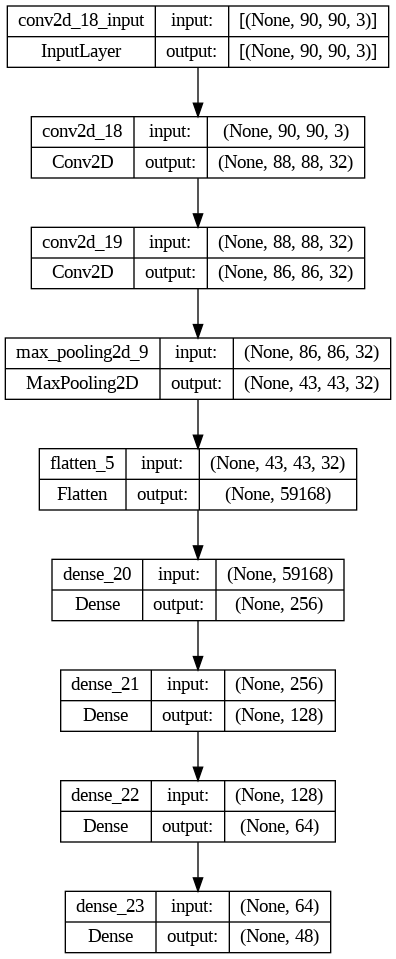

In [ ]:
import tensorflow as tf

tf.keras.utils.plot_model(model,"multi_input_and_output_model.png",show_shapes=True)

#Traning the model

###defining the learning rate to optimizer

In [ ]:
from tensorflow import keras
opt = keras.optimizers.legacy.Adam(lr=0.00001)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 88, 88, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 86, 86, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 59168)             0         
                                                                 
 dense_20 (Dense)            (None, 256)               15147264  
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                      

In [ ]:
# model.compile(loss='categorical_crossentropy', optimizer='adam')

# Make sure that the data is properly formatted.
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], 1))

# Reduce the batch size.
# history = model.fit(X_train, y_train, batch_size=10, epochs=10)

###Training the model with 10 epochs


In [ ]:
history = model.fit(X_train, y_train,validation_data=(X_validation, y_validation), batch_size=30, epochs=15)

Epoch 1/15
256/256 [==============================] - 208s 809ms/step - loss: 6.9232 - accuracy: 0.0503 - val_loss: 3.8018 - val_accuracy: 0.0979
Epoch 2/15
256/256 [==============================] - 199s 778ms/step - loss: 3.4420 - accuracy: 0.1217 - val_loss: 3.3213 - val_accuracy: 0.1688
Epoch 3/15
256/256 [==============================] - 201s 786ms/step - loss: 3.0515 - accuracy: 0.2052 - val_loss: 2.8330 - val_accuracy: 0.2750
Epoch 4/15
256/256 [==============================] - 202s 788ms/step - loss: 2.6868 - accuracy: 0.2876 - val_loss: 2.4434 - val_accuracy: 0.3438
Epoch 5/15
256/256 [==============================] - 202s 789ms/step - loss: 2.2827 - accuracy: 0.3732 - val_loss: 2.1401 - val_accuracy: 0.4062
Epoch 6/15
256/256 [==============================] - 197s 769ms/step - loss: 1.7518 - accuracy: 0.4979 - val_loss: 1.6304 - val_accuracy: 0.5365
Epoch 7/15
256/256 [==============================] - 196s 766ms/step - loss: 1.2149 - accuracy: 0.6362 - val_loss: 1.5225 -

###Saving the model

In [ ]:
model.save("TSR2.h5")

###Plotting the acuuracy and loss against epochs

In [ ]:
#plotting graphs for accuracy
plt.figure(0)                                                                        # figure index do
plt.plot(history.history['accuracy'], label='training accuracy')                     # trainingaccuracy values do
plt.title('Accuracy')                                                                # title dedo
plt.xlabel('epochs')                                                                 # xlabel
plt.ylabel('accuracy')                                                               # ylabel
plt.legend()                                                                         # legend
plt.show()                                                                           # show kro
#plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

##Finding the accuracy on test data

In [ ]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
# print(pred)

pred = np.argmax(pred, axis=1)
print("predicted values :",list(pred))

y_test_values = []
for i in range(len(y_test)):
  y_test_values.append(np.where(y_test[i] == 1)[0][0])

print("y_test           :",y_test_values)

30/30 [==============================] - 8s 257ms/step
predicted values : [44, 2, 1, 10, 26, 21, 3, 34, 12, 39, 3, 25, 39, 12, 7, 6, 9, 4, 19, 39, 3, 1, 37, 39, 27, 46, 44, 41, 19, 18, 26, 17, 33, 1, 27, 20, 11, 19, 12, 37, 39, 3, 12, 14, 46, 43, 10, 26, 27, 26, 24, 41, 18, 6, 6, 34, 45, 16, 0, 47, 10, 45, 27, 39, 30, 36, 16, 10, 10, 26, 47, 45, 36, 42, 42, 10, 6, 43, 38, 7, 12, 39, 19, 10, 11, 11, 46, 1, 14, 32, 1, 38, 6, 28, 29, 8, 25, 8, 23, 17, 25, 28, 26, 28, 45, 47, 46, 28, 14, 33, 3, 9, 37, 36, 1, 42, 19, 4, 8, 17, 22, 6, 9, 29, 21, 39, 21, 47, 18, 11, 14, 6, 19, 40, 23, 19, 36, 11, 28, 2, 29, 38, 1, 38, 4, 22, 29, 22, 39, 31, 36, 32, 18, 15, 20, 38, 39, 14, 13, 1, 25, 23, 46, 31, 15, 40, 45, 25, 18, 10, 41, 37, 6, 16, 43, 25, 37, 6, 37, 15, 1, 1, 28, 16, 27, 12, 7, 24, 47, 10, 29, 31, 39, 32, 14, 40, 10, 6, 4, 7, 46, 38, 19, 22, 12, 43, 19, 34, 7, 8, 39, 30, 31, 20, 27, 19, 41, 22, 3, 40, 20, 2, 6, 18, 35, 38, 10, 34, 16, 18, 43, 28, 6, 43, 4, 40, 26, 31, 46, 28, 11, 29, 30, 29

In [ ]:
print("Accuracy :",accuracy_score(y_test_values, pred)*100 ,"%")

Accuracy : 86.35416666666667 %


##Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_values, pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[16  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ... 23  0  0]
 [ 0  0  0 ...  0 20  0]
 [ 0  0  0 ...  0  0 21]]


##Let's make a prediction

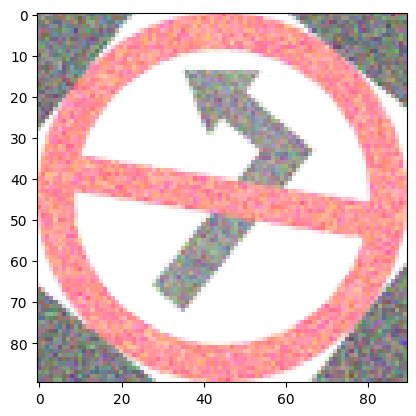

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
plt.imshow(X_test[74], interpolation='nearest')
plt.show()

###Predicting the above image

In [ ]:
print("Predicted number for given image is :",pred[74])
print(pred[74],"is For :",Index_with_img[pred[74]])

Predicted number for given image is : 42
42 is For : LEFT TURN PROHIBITED


In [ ]:
from PIL import Image
import numpy as np
from keras.models import load_model

# Load the saved model
loaded_model = load_model("/content/TSR2.h5")

# Assuming you have a new image for prediction
new_image_path = "/content/images.png"
new_image = Image.open(new_image_path)
new_image = new_image.resize((90, 90))
new_image = np.array(new_image)
# new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension


if new_image.shape==(90,90,4):
  new_image = new_image[:, :, :3]

if new_image.shape==(90,90):
  new_image = np.repeat(new_image[:, :, np.newaxis], 3, axis=-1)


# Make prediction using the loaded model
prediction = loaded_model.predict(np.array([new_image]))

# Get the predicted class
predicted_class = np.argmax(prediction)

print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 104ms/step
Predicted class: 3


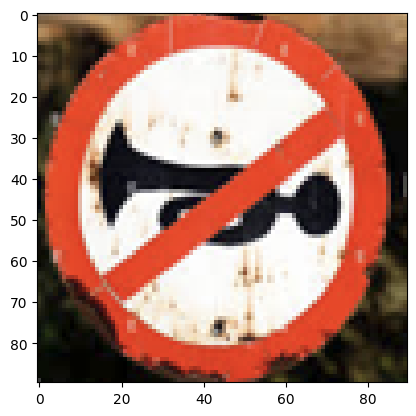

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(new_image)

In [ ]:
from PIL import Image
import numpy as np
from keras.models import load_model

# Load the saved model
loaded_model = load_model("/content/TSR2.h5")

# Assuming you have a new image for prediction
new_image_path = "/content/hornImg.png"
new_image = Image.open(new_image_path)
new_image = new_image.resize((90, 90))
new_image = np.array(new_image)
# new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension


if new_image.shape==(90,90,4):
  new_image = new_image[:, :, :3]

if new_image.shape==(90,90):
  new_image = np.repeat(new_image[:, :, np.newaxis], 3, axis=-1)


# Make prediction using the loaded model
prediction = loaded_model.predict(np.array([new_image]))

# Get the predicted class
predicted_class = np.argmax(prediction)

print("Predicted class:", predicted_class)



1/1 [==============================] - 0s 129ms/step
Predicted class: 44


In [ ]:
import os
dataset_path = "/content/drive/MyDrive/Dataset"
listOfimgs = os.listdir(dataset_path)

Index_with_img = dict()

for i in range(len(listOfimgs)):
  Index_with_img[i] = listOfimgs[i][:-4]

print(Index_with_img)

{0: 'Horn', 1: 'Curve to the left', 2: 'Curve to the right', 3: 'Steep descent', 4: 'Steep ascent', 5: 'Road narrows', 6: 'Road narrows on left side', 7: 'Road narrows on right side', 8: 'Opening bridge', 9: 'Quayside or riverbank ahead', 10: 'Uneven road', 11: 'Road for bump', 12: 'Dip', 13: 'Slippery road', 14: 'Slippery road(1)', 15: 'Loose stones', 16: 'Falling rocks', 17: 'Pedestrian crossing', 18: 'Children', 19: 'Cyclists', 20: 'Animals for cattle', 21: 'Animals for deer', 22: 'Roadworks', 23: 'Traffic signals', 24: 'Crossroad without priority', 25: 'Crossroad without priority(1)', 26: 'Side road junction to left', 27: 'Side road junction to right', 28: 'Roundabout', 29: 'Two-way traffic', 30: 'Level crossing with barriers ahead', 31: 'Level crossing without barriers ahead', 32: 'Low-flying aircraft', 33: 'Crosswind', 34: 'Other dangers', 35: 'Priority for oncoming traffic', 36: 'Stop', 37: 'Give way', 38: 'No entry', 39: 'One way', 40: 'One way(1)', 41: 'Right turn prohibited',